# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools
import librosa
import librosa.display


In [2]:
INPUT_DIR = 'H:/Il mio Drive/Universita/Foundations of Deep Learning/Progetto FDL/Dataset TUT/Development/audio'
OUTPUT_DIR = 'H:/Il mio Drive/Universita/Foundations of Deep Learning/Progetto FDL/Dataset TUT/Development/'

## Importazione dei file audio e creazione degli spettrogrammi

Stampa dei nomi dei file presenti.

In [3]:
nomi_file = os.listdir(INPUT_DIR)
nomi_file.sort()
for i in range(10):
    print(nomi_file[i])

a001_0_10.wav
a001_100_110.wav
a001_10_20.wav
a001_110_120.wav
a001_120_130.wav
a001_130_140.wav
a001_140_150.wav
a001_150_160.wav
a001_160_170.wav
a001_170_180.wav


Importazione del dataset che associa i nomi dei file alle classi dal file _meta.txt_.

In [4]:
df = pd.read_csv(OUTPUT_DIR +'meta.txt', sep='\t', header=None)
df

,0,1,2
0,audio/b020_90_100.wav,beach,b020
1,audio/b020_110_120.wav,beach,b020
2,audio/b020_100_110.wav,beach,b020
3,audio/b020_40_50.wav,beach,b020
4,audio/b020_50_60.wav,beach,b020
...,...,...,...
4675,audio/b081_50_60.wav,tram,b081
4676,audio/b081_60_70.wav,tram,b081
4677,audio/b081_100_110.wav,tram,b081
4678,audio/b081_110_120.wav,tram,b081


Creazione degli spettrogrammi degli STFT e dei MMFCCs e salvataggio in due cartelle con una struttura ad albero in base alle classi.

In [ ]:
if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-stft')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'audio-stft'))

if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-mfccs')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'audio-mfccs'))

for file in os.listdir(INPUT_DIR):
    if "wav" in file:
        file_path = os.path.join(INPUT_DIR, file)
        y, sr = librosa.load(file_path, sr=None)
        S = np.abs(librosa.stft(y, n_fft=2048, window='hann', center=True, pad_mode='constant'))
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        file_stem = Path(file_path).stem
        file_finale = 'audio/' + file_stem + '.wav'
        directory_classe = f'class_{df[df[0] == file_finale][1].item()}'

        dir_stft = os.path.join(os.path.join(OUTPUT_DIR, 'audio-stft'), directory_classe)
        file_path_stft = os.path.join(dir_stft, file_stem)
        if not os.path.exists(file_path_stft + '.png'):
            if not os.path.exists(dir_stft):
                os.mkdir(dir_stft)
            fig, ax = plt.subplots()
            img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time', ax=ax)
            fig.colorbar(img, ax=ax, format="%+2.0f dB")
            fig.savefig(f'{file_path_stft}.png', transparent=True)
            fig.clear()
            plt.close(fig)
                
        dir_mfccs = os.path.join(os.path.join(OUTPUT_DIR, 'audio-mfccs'), directory_classe)
        file_path_mfccs = os.path.join(dir_mfccs, file_stem)
        if not os.path.exists(file_path_mfccs + '.png'):
            if not os.path.exists(dir_mfccs):
                os.mkdir(dir_mfccs)
            fig, ax = plt.subplots()  
            img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
            fig.colorbar(img, ax=ax)
            fig.savefig(f'{file_path_mfccs}.png', transparent=True)
            fig.clear()
            plt.close(fig)

Elenco delle classi presenti.

In [5]:
classi = os.listdir(os.path.join(OUTPUT_DIR, 'audio-stft'))
print("Classi: \n")
for i in range(15):
    print(classi[i])

Classi: 

class_residential_area
class_park
class_city_center
class_beach
class_home
class_forest_path
class_bus
class_grocery_store
class_cafe-restaurant
class_car
class_train
class_tram
class_metro_station
class_office
class_library


Visualizzazione di un'onda per ogni classe.

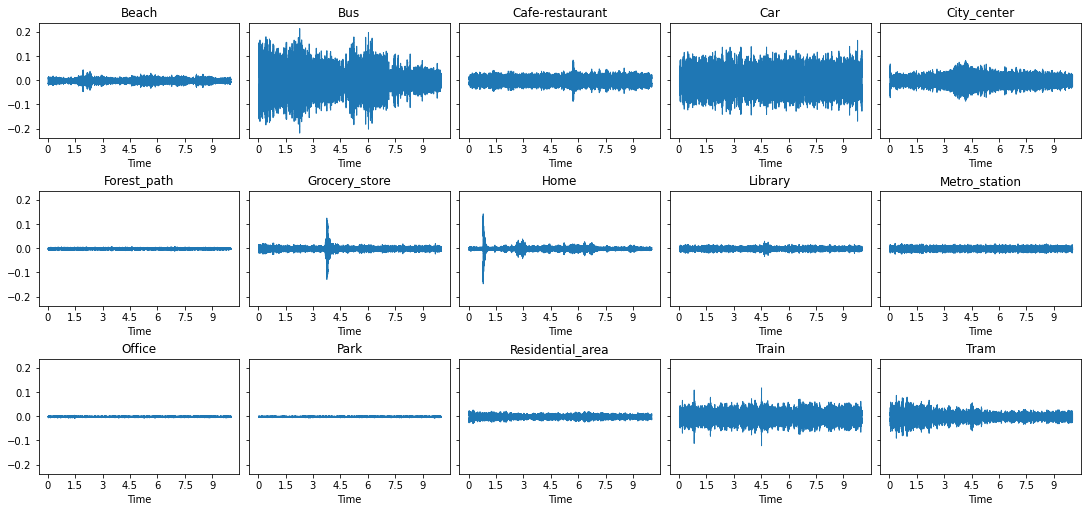

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 7), sharex=False, sharey=True, constrained_layout=True)

for classe, ax in zip(df[1].unique(), axs.ravel()):
    audio = df[df[1] == classe].iloc[1]
    y, sr = librosa.load(os.path.join(OUTPUT_DIR, audio[0]), sr=None)

    img = librosa.display.waveshow(y, sr=sr, ax=ax)
    ax.set(title=audio[1].capitalize())

plt.show()

Visualizzazione di uno spettrogramma STFT per ogni classe.

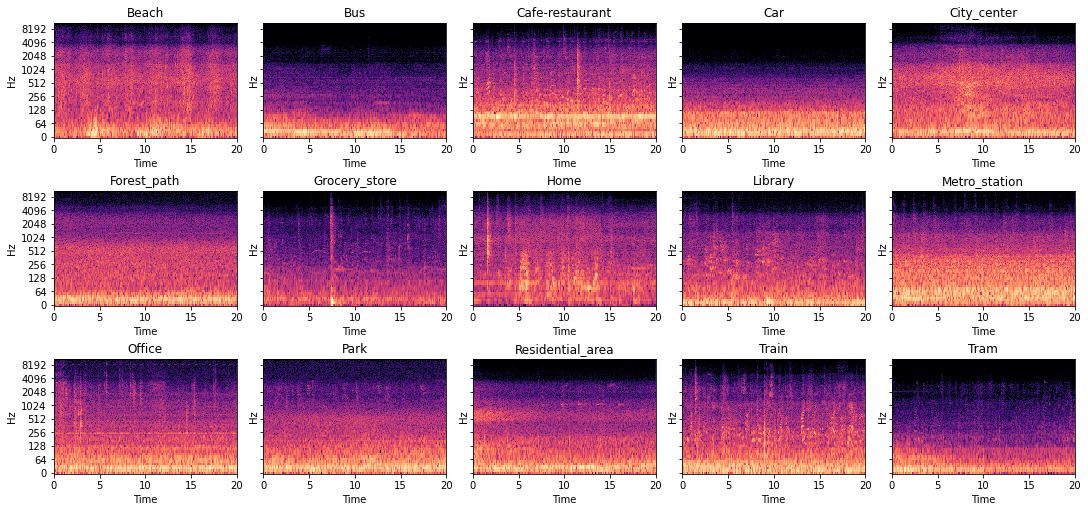

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 7), sharex=False, sharey=True, constrained_layout=True)

for classe, ax in zip(df[1].unique(), axs.ravel()):
    audio = df[df[1] == classe].iloc[1]
    y, sr = librosa.load(os.path.join(OUTPUT_DIR, audio[0]), sr=None)
    S = np.abs(librosa.stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, pad_mode='constant'))
    img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
    ax.set(title=audio[1].capitalize())

plt.show()

Visualizzazione di uno spettrogramma MFCCs per ogni classe.

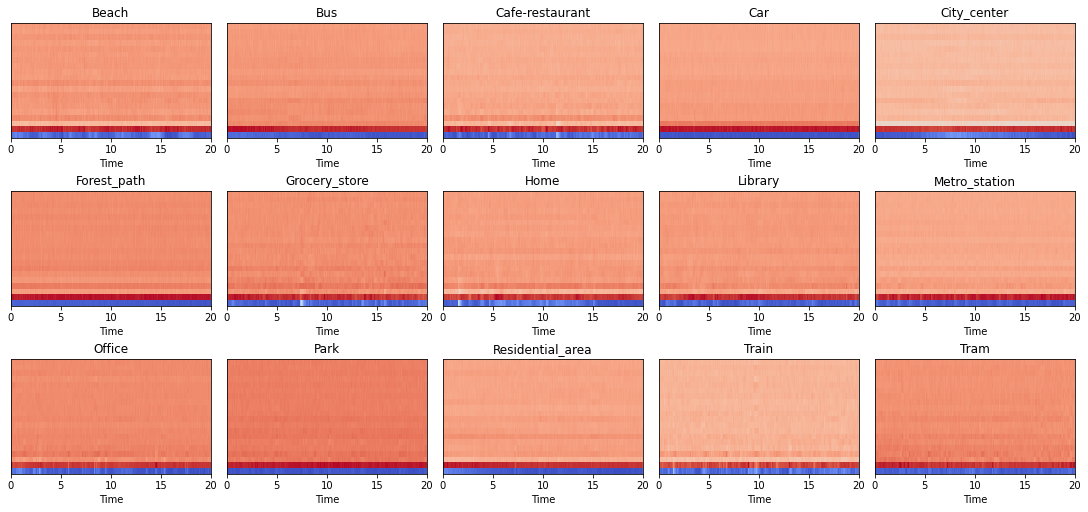

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 7), sharex=False, sharey=True, constrained_layout=True)

for classe, ax in zip(df[1].unique(), axs.ravel()):
    audio = df[df[1] == classe].iloc[1]
    y, sr = librosa.load(os.path.join(OUTPUT_DIR, audio[0]), sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    ax.set(title=audio[1].capitalize())

plt.show()

## Creazione training e test set

Dichiarazioni costanti per la creazione di training e test.

In [9]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 15

Creazione di training e test.

In [23]:
train_dataset_stft = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.3,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-stft'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

valid_dataset_stft = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.3,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-stft'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 4680 files belonging to 15 classes.
Using 3276 files for training.
Found 4680 files belonging to 15 classes.
Using 1404 files for validation.


In [24]:
train_dataset_mfccs = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.3,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-mfccs'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

valid_dataset_mfccs = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.3,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-mfccs'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 4680 files belonging to 15 classes.
Using 3276 files for training.
Found 4680 files belonging to 15 classes.
Using 1404 files for validation.


Visualizzazione di alcune immagini del training dataset.

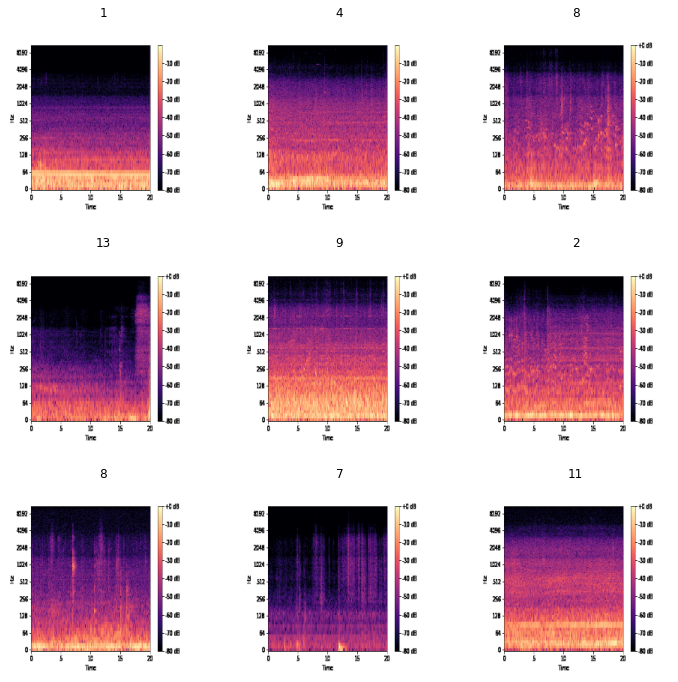

In [25]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset_stft.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

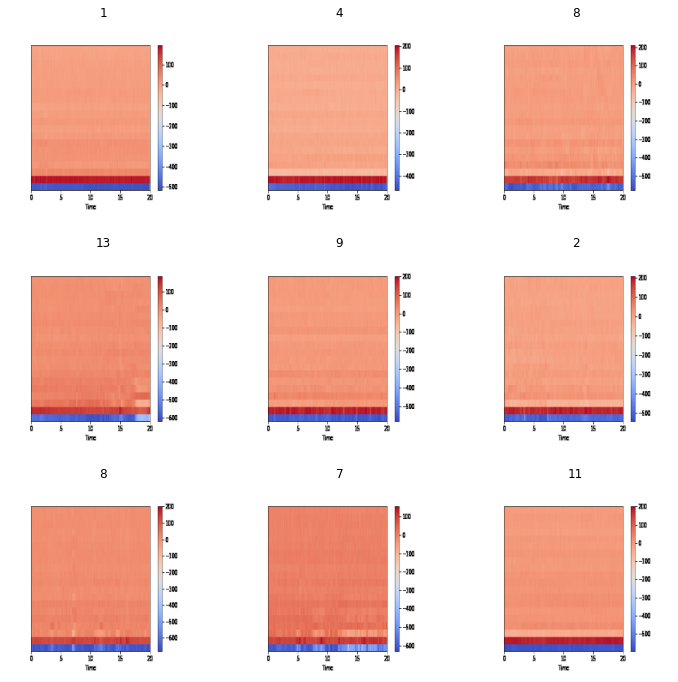

In [26]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset_mfccs.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

Riscalo delle immagini dei dataset in un range da 0 a 1.

In [27]:
def prepare(ds):
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    return ds

train_dataset_stft = prepare(train_dataset_stft)
valid_dataset_stft = prepare(valid_dataset_stft)

train_dataset_mfccs = prepare(train_dataset_mfccs)
valid_dataset_mfccs = prepare(valid_dataset_mfccs)

# Applicazione dei modelli agli spettrogrammi STFT

Osservazione e confronto degli optimizer a disposizione. Abbiamo utilizzato il medesimo modello e posto quindi a confronto optimizer=RMSprop() con optimizer=Adam().
Mostrato di seguito quanto appena affermato.

## Modello RMSprop

In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [29]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 global_max_pooling2d_1 (Glo  (None, 64)               0         
 balMaxPooling2D)                                                
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 20,367
Trainable params: 20,367
Non-trai

In [30]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

In [31]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])


Epoch 1/50
103/103 [==============================] - 17s 108ms/step - loss: 2.6873 - accuracy: 0.0885 - val_loss: 2.6214 - val_accuracy: 0.1254
Epoch 2/50
103/103 [==============================] - 10s 97ms/step - loss: 2.5174 - accuracy: 0.1590 - val_loss: 2.4368 - val_accuracy: 0.1766
Epoch 3/50
103/103 [==============================] - 10s 97ms/step - loss: 2.3488 - accuracy: 0.2015 - val_loss: 2.2873 - val_accuracy: 0.2678
Epoch 4/50
103/103 [==============================] - 11s 97ms/step - loss: 2.2490 - accuracy: 0.2198 - val_loss: 2.3275 - val_accuracy: 0.1852
Epoch 5/50
103/103 [==============================] - 10s 97ms/step - loss: 2.1796 - accuracy: 0.2424 - val_loss: 2.1722 - val_accuracy: 0.2329
Epoch 6/50
103/103 [==============================] - 10s 95ms/step - loss: 2.1213 - accuracy: 0.2595 - val_loss: 2.1767 - val_accuracy: 0.2329
Epoch 7/50
103/103 [==============================] - 10s 96ms/step - loss: 2.0639 - accuracy: 0.2827 - val_loss: 2.1027 - val_accuracy

Grafico della loss function.

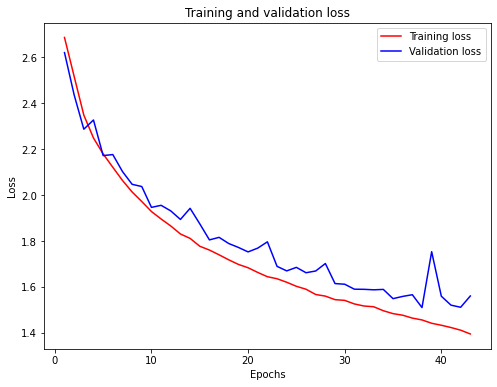

In [32]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy.

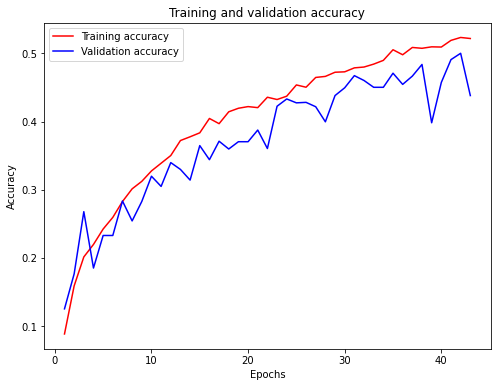

In [33]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [34]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Loss finale: {0:.6f}, accuracy finale: {1:.6f}".format(final_loss, final_acc))

Loss finale: 1.560048, accuracy finale: 0.438034


Salvataggio del modello.

In [35]:
model.save('modelloRMS_stft.h5')

## Modello Adam

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [37]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 global_max_pooling2d_2 (Glo  (None, 64)               0         
 balMaxPooling2D)                                                
                                                                 
 dense_2 (Dense)             (None, 15)                975       
                                                                 
Total params: 20,367
Trainable params: 20,367
Non-tra

In [38]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [39]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 11s 97ms/step - loss: 2.6974 - accuracy: 0.0809 - val_loss: 2.6591 - val_accuracy: 0.1325
Epoch 2/50
103/103 [==============================] - 10s 95ms/step - loss: 2.5607 - accuracy: 0.1471 - val_loss: 2.4372 - val_accuracy: 0.1531
Epoch 3/50
103/103 [==============================] - 10s 95ms/step - loss: 2.3618 - accuracy: 0.1923 - val_loss: 2.3115 - val_accuracy: 0.1467
Epoch 4/50
103/103 [==============================] - 10s 95ms/step - loss: 2.2492 - accuracy: 0.2256 - val_loss: 2.2267 - val_accuracy: 0.2016
Epoch 5/50
103/103 [==============================] - 10s 94ms/step - loss: 2.1774 - accuracy: 0.2436 - val_loss: 2.1668 - val_accuracy: 0.2379
Epoch 6/50
103/103 [==============================] - 10s 94ms/step - loss: 2.1215 - accuracy: 0.2686 - val_loss: 2.1117 - val_accuracy: 0.2749
Epoch 7/50
103/103 [==============================] - 10s 96ms/step - loss: 2.0739 - accuracy: 0.2692 - val_loss: 2.0637 - val_accuracy:

Grafico della loss function.

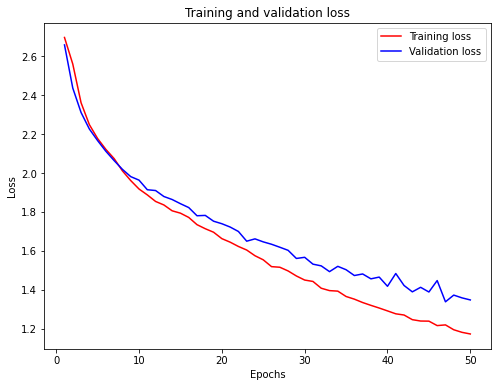

In [40]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy.

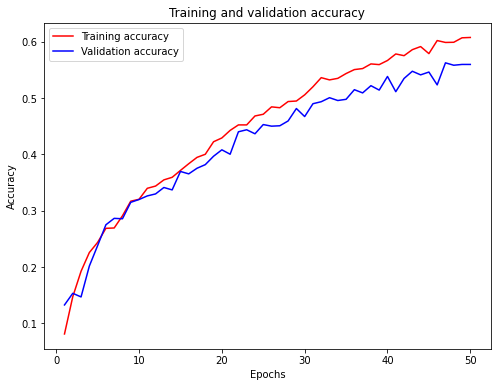

In [41]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [42]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Loss finale: {0:.6f}, accuracy finale: {1:.6f}".format(final_loss, final_acc))

Loss finale: 1.347244, accuracy finale: 0.559829


Salvataggio del modello.

In [43]:
model.save('modelloAdam_stft.h5')

Si osserva che l'ottimizzatore Adam produce migliori performance in termini di accuratezza rispetto all'ottimizzatore RMSprop. Decidiamo quindi di utilizzare Adam come optimizer per i successivi modelli.

## Modelli scelti

Di seguito è possibile osservare 6 modelli scelti tra quelli analizzati in questo progetto. I modelli presentano una complessità e profondità crescenti che comportano un aumento progressivo dell'accuratezza. 

## Modello 1

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [45]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 global_max_pooling2d_3 (Glo  (None, 64)               0         
 balMaxPooling2D)                                                
                                                                 
 dense_3 (Dense)             (None, 15)                975       
                                                                 
Total params: 20,367
Trainable params: 20,367
Non-tra

In [46]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [47]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 11s 97ms/step - loss: 2.6831 - accuracy: 0.1068 - val_loss: 2.6272 - val_accuracy: 0.1446
Epoch 2/50
103/103 [==============================] - 10s 96ms/step - loss: 2.5106 - accuracy: 0.1587 - val_loss: 2.4241 - val_accuracy: 0.1346
Epoch 3/50
103/103 [==============================] - 10s 96ms/step - loss: 2.3397 - accuracy: 0.1954 - val_loss: 2.3010 - val_accuracy: 0.1731
Epoch 4/50
103/103 [==============================] - 10s 96ms/step - loss: 2.2298 - accuracy: 0.2268 - val_loss: 2.1999 - val_accuracy: 0.2436
Epoch 5/50
103/103 [==============================] - 10s 96ms/step - loss: 2.1280 - accuracy: 0.2711 - val_loss: 2.0803 - val_accuracy: 0.3056
Epoch 6/50
103/103 [==============================] - 10s 96ms/step - loss: 2.0193 - accuracy: 0.3132 - val_loss: 2.0121 - val_accuracy: 0.3326
Epoch 7/50
103/103 [==============================] - 10s 96ms/step - loss: 1.9236 - accuracy: 0.3327 - val_loss: 1.8859 - val_accuracy:

Grafico della loss function.

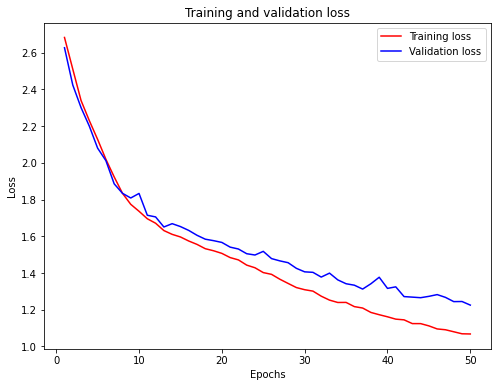

In [48]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy

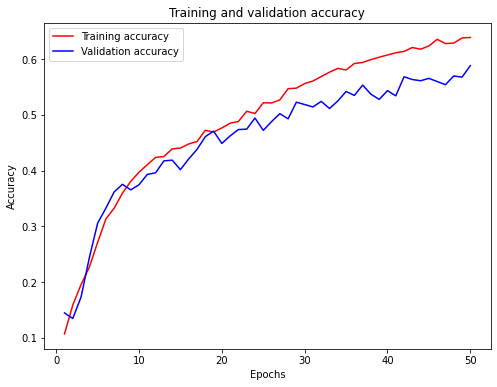

In [49]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [50]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 1.225367, final accuracy: 0.588319


Salvataggio del modello

In [51]:
model.save('modello1_stft.h5')

## Modello 2

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding='same'))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding='same'))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [53]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 86, 86, 64)     

In [56]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [57]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 14s 128ms/step - loss: 2.1788 - accuracy: 0.2927 - val_loss: 3.3202 - val_accuracy: 0.0698
Epoch 2/50
103/103 [==============================] - 13s 120ms/step - loss: 1.7202 - accuracy: 0.4457 - val_loss: 3.0042 - val_accuracy: 0.0712
Epoch 3/50
103/103 [==============================] - 13s 124ms/step - loss: 1.4353 - accuracy: 0.5317 - val_loss: 2.0250 - val_accuracy: 0.3811
Epoch 4/50
103/103 [==============================] - 13s 121ms/step - loss: 1.2489 - accuracy: 0.5980 - val_loss: 1.5132 - val_accuracy: 0.4786
Epoch 5/50
103/103 [==============================] - 13s 121ms/step - loss: 1.0937 - accuracy: 0.6401 - val_loss: 1.5812 - val_accuracy: 0.4687
Epoch 6/50
103/103 [==============================] - 13s 120ms/step - loss: 1.0304 - accuracy: 0.6719 - val_loss: 1.0584 - val_accuracy: 0.6546
Epoch 7/50
103/103 [==============================] - 13s 124ms/step - loss: 0.9445 - accuracy: 0.6905 - val_loss: 0.9958 - val_ac

Grafico della loss function

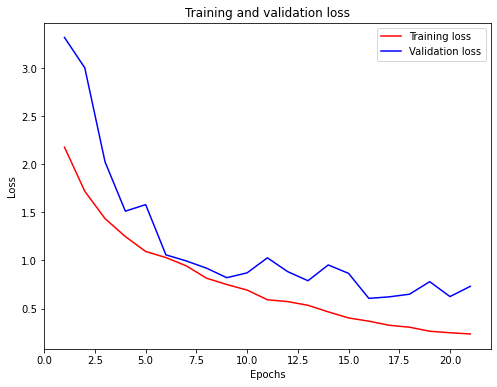

In [58]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy

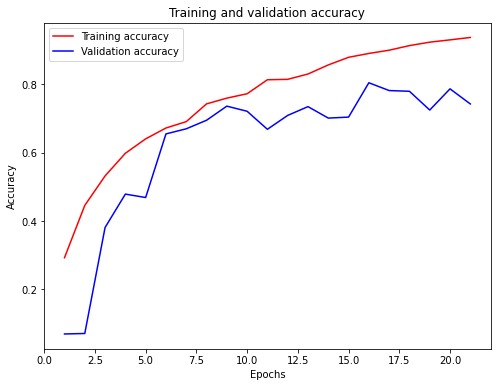

In [59]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [60]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.731330, final accuracy: 0.742165


Salvataggio del modello

In [61]:
model.save('modello2_stft.h5')

## Modello 3

In [126]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding='same'))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding='same'))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [127]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_78 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 86, 86, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 batch_normalization_79 (Bat  (None, 86, 86, 64)     

In [128]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [129]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 14s 127ms/step - loss: 2.7807 - accuracy: 0.1084 - val_loss: 2.7893 - val_accuracy: 0.0748
Epoch 2/50
103/103 [==============================] - 14s 129ms/step - loss: 2.2660 - accuracy: 0.2558 - val_loss: 2.7381 - val_accuracy: 0.1040
Epoch 3/50
103/103 [==============================] - 13s 125ms/step - loss: 1.8363 - accuracy: 0.3984 - val_loss: 2.4507 - val_accuracy: 0.1360
Epoch 4/50
103/103 [==============================] - 13s 125ms/step - loss: 1.5107 - accuracy: 0.4988 - val_loss: 1.9700 - val_accuracy: 0.3063
Epoch 5/50
103/103 [==============================] - 14s 129ms/step - loss: 1.2808 - accuracy: 0.5806 - val_loss: 1.5690 - val_accuracy: 0.4623
Epoch 6/50
103/103 [==============================] - 13s 123ms/step - loss: 1.1908 - accuracy: 0.6093 - val_loss: 1.3098 - val_accuracy: 0.5356
Epoch 7/50
103/103 [==============================] - 13s 125ms/step - loss: 1.0365 - accuracy: 0.6538 - val_loss: 1.1080 - val_ac

Grafico della loss function

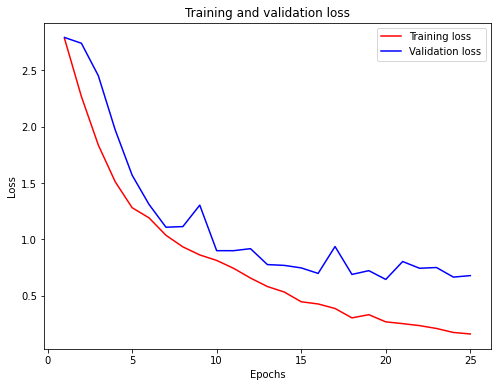

In [130]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy

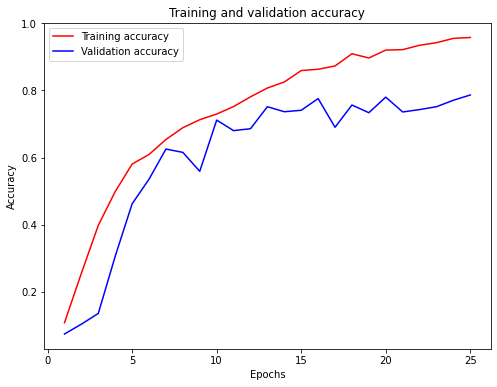

In [131]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [132]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.679064, final accuracy: 0.786325


Salvataggio del modello

In [133]:
model.save('modello3_stft.h5')

## Modello 4

In [94]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

In [95]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_33 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_34 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 64)        18496     
                                                     

In [96]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [97]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 10s 89ms/step - loss: 1.5957 - accuracy: 0.5018 - val_loss: 8.5027 - val_accuracy: 0.1125
Epoch 2/50
103/103 [==============================] - 10s 88ms/step - loss: 0.8230 - accuracy: 0.7445 - val_loss: 7.8617 - val_accuracy: 0.0698
Epoch 3/50
103/103 [==============================] - 10s 88ms/step - loss: 0.4581 - accuracy: 0.8697 - val_loss: 6.2402 - val_accuracy: 0.1503
Epoch 4/50
103/103 [==============================] - 10s 89ms/step - loss: 0.2600 - accuracy: 0.9335 - val_loss: 5.7212 - val_accuracy: 0.1147
Epoch 5/50
103/103 [==============================] - 10s 89ms/step - loss: 0.1400 - accuracy: 0.9741 - val_loss: 3.6739 - val_accuracy: 0.3298
Epoch 6/50
103/103 [==============================] - 10s 89ms/step - loss: 0.0810 - accuracy: 0.9872 - val_loss: 3.1874 - val_accuracy: 0.3276
Epoch 7/50
103/103 [==============================] - 10s 89ms/step - loss: 0.0507 - accuracy: 0.9942 - val_loss: 1.3031 - val_accuracy:

Grafico della loss function

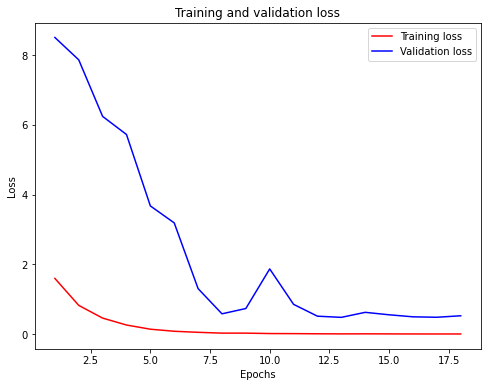

In [98]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy

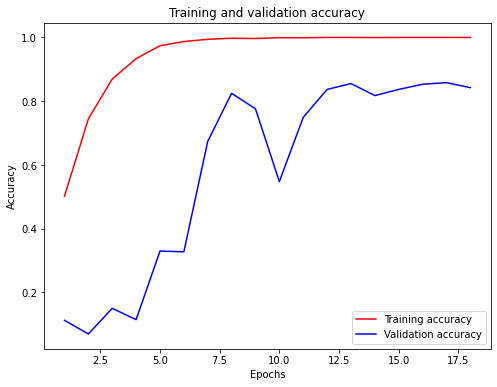

In [99]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [100]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.524605, final accuracy: 0.842593


Salvataggio del modello.

In [102]:
model.save('modello4_stft.h5')

## Modello 5

In [107]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [108]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_58 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_59 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 64)        18496     
                                                     

In [109]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [110]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 12s 99ms/step - loss: 1.5242 - accuracy: 0.5189 - val_loss: 5.7726 - val_accuracy: 0.0734
Epoch 2/50
103/103 [==============================] - 10s 92ms/step - loss: 0.9336 - accuracy: 0.7036 - val_loss: 7.4802 - val_accuracy: 0.1368
Epoch 3/50
103/103 [==============================] - 10s 91ms/step - loss: 0.6533 - accuracy: 0.7875 - val_loss: 6.4700 - val_accuracy: 0.1425
Epoch 4/50
103/103 [==============================] - 10s 92ms/step - loss: 0.4713 - accuracy: 0.8602 - val_loss: 5.3217 - val_accuracy: 0.1553
Epoch 5/50
103/103 [==============================] - 10s 91ms/step - loss: 0.3481 - accuracy: 0.8907 - val_loss: 6.1861 - val_accuracy: 0.0897
Epoch 6/50
103/103 [==============================] - 10s 93ms/step - loss: 0.2286 - accuracy: 0.9374 - val_loss: 1.4786 - val_accuracy: 0.6090
Epoch 7/50
103/103 [==============================] - 10s 92ms/step - loss: 0.1633 - accuracy: 0.9631 - val_loss: 0.7596 - val_accuracy:

Grafico della loss function.

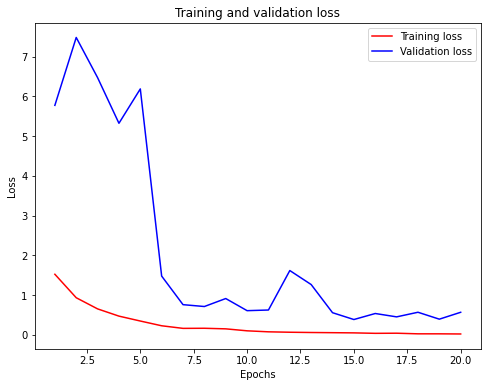

In [111]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy

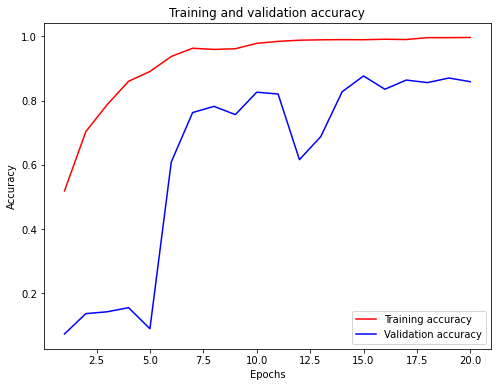

In [112]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss function e accuracy finali

In [113]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.567916, final accuracy: 0.858974


Salvataggio del modello

In [114]:
model.save('modello5_stft.h5')

## Modello 6

In [134]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [135]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 batch_normalization_81 (Bat  (None, 256, 256, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_82 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 128, 128, 32)      4640      
                                                     

In [136]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [137]:
history = model.fit(train_dataset_stft, epochs=50, validation_data=valid_dataset_stft, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 15s 126ms/step - loss: 1.5565 - accuracy: 0.5055 - val_loss: 5.2227 - val_accuracy: 0.0677
Epoch 2/50
103/103 [==============================] - 12s 113ms/step - loss: 0.9137 - accuracy: 0.7054 - val_loss: 6.1010 - val_accuracy: 0.1375
Epoch 3/50
103/103 [==============================] - 12s 112ms/step - loss: 0.6187 - accuracy: 0.7998 - val_loss: 3.4318 - val_accuracy: 0.3704
Epoch 4/50
103/103 [==============================] - 12s 113ms/step - loss: 0.4152 - accuracy: 0.8663 - val_loss: 2.2788 - val_accuracy: 0.4473
Epoch 5/50
103/103 [==============================] - 12s 112ms/step - loss: 0.3073 - accuracy: 0.9066 - val_loss: 1.2104 - val_accuracy: 0.6047
Epoch 6/50
103/103 [==============================] - 12s 112ms/step - loss: 0.1858 - accuracy: 0.9509 - val_loss: 0.5644 - val_accuracy: 0.8184
Epoch 7/50
103/103 [==============================] - 12s 112ms/step - loss: 0.1318 - accuracy: 0.9673 - val_loss: 0.4470 - val_ac

Grafico della loss function

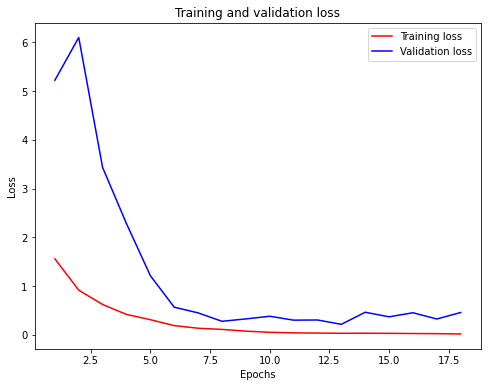

In [138]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy

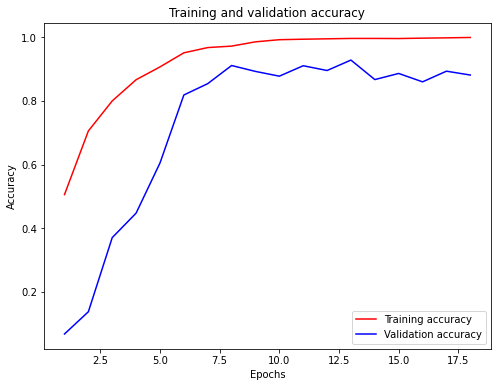

In [139]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss function e accuracy finali

In [140]:
final_loss, final_acc = model.evaluate(valid_dataset_stft, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.455407, final accuracy: 0.881054


Salvataggio del modello

In [142]:
model.save('modello6_stft.h5')

# Applicazione dei modelli agli spettrogrammi MFCCs

Osservazione e confronto degli optimizer a disposizione. Abbiamo utilizzato il medesimo modello e posto quindi a confronto optimizer=RMSprop() con optimizer=Adam().
Mostrato di seguito quanto appena affermato:

## Modello RMSprop

In [155]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [156]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 86, 86, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 global_max_pooling2d_11 (Gl  (None, 64)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_33 (Dense)            (None, 15)                975       
                                                                 
Total params: 20,367
Trainable params: 20,367
Non-tra

In [157]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

In [158]:
history = model.fit(train_dataset_mfccs, epochs=50, validation_data=valid_dataset_mfccs, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 11s 98ms/step - loss: 2.7212 - accuracy: 0.0635 - val_loss: 2.7441 - val_accuracy: 0.0677
Epoch 2/50
103/103 [==============================] - 10s 95ms/step - loss: 2.7033 - accuracy: 0.0897 - val_loss: 2.6939 - val_accuracy: 0.1061
Epoch 3/50
103/103 [==============================] - 10s 95ms/step - loss: 2.6570 - accuracy: 0.1319 - val_loss: 2.6341 - val_accuracy: 0.1075
Epoch 4/50
103/103 [==============================] - 10s 93ms/step - loss: 2.5450 - accuracy: 0.1801 - val_loss: 2.4955 - val_accuracy: 0.1887
Epoch 5/50
103/103 [==============================] - 10s 89ms/step - loss: 2.3902 - accuracy: 0.2390 - val_loss: 2.4167 - val_accuracy: 0.1845
Epoch 6/50
103/103 [==============================] - 10s 93ms/step - loss: 2.2544 - accuracy: 0.2842 - val_loss: 2.2638 - val_accuracy: 0.2179
Epoch 7/50
103/103 [==============================] - 10s 89ms/step - loss: 2.1522 - accuracy: 0.2988 - val_loss: 2.1577 - val_accuracy:

Grafico della loss function.

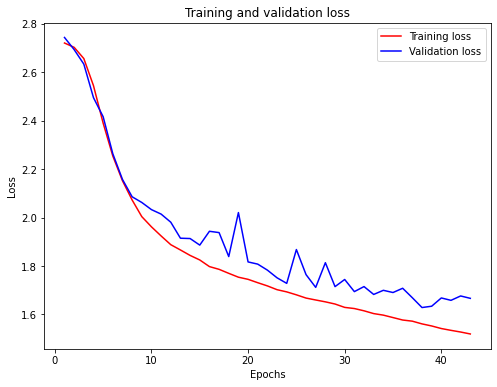

In [159]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy.

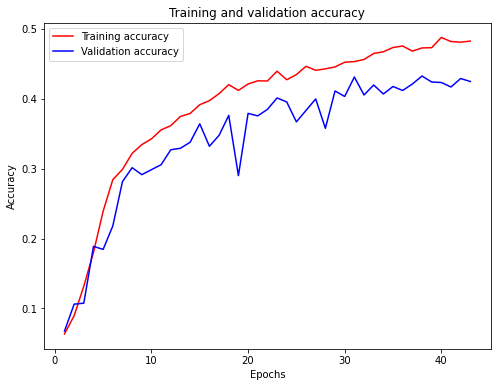

In [160]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [161]:
final_loss, final_acc = model.evaluate(valid_dataset_mfccs, verbose=0)
print("Loss finale: {0:.6f}, accuracy finale: {1:.6f}".format(final_loss, final_acc))

Loss finale: 1.666518, accuracy finale: 0.424501


Salvataggio del modello.

In [162]:
model.save('modelloRMS_mfccs.h5')

## Modello Adam

In [163]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [164]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 86, 86, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 global_max_pooling2d_12 (Gl  (None, 64)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_34 (Dense)            (None, 15)                975       
                                                                 
Total params: 20,367
Trainable params: 20,367
Non-tra

In [165]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [166]:
history = model.fit(train_dataset_mfccs, epochs=50, validation_data=valid_dataset_mfccs, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 10s 88ms/step - loss: 2.7224 - accuracy: 0.0668 - val_loss: 2.7105 - val_accuracy: 0.0855
Epoch 2/50
103/103 [==============================] - 10s 88ms/step - loss: 2.6908 - accuracy: 0.0995 - val_loss: 2.6641 - val_accuracy: 0.1417
Epoch 3/50
103/103 [==============================] - 9s 88ms/step - loss: 2.5913 - accuracy: 0.1587 - val_loss: 2.4916 - val_accuracy: 0.1517
Epoch 4/50
103/103 [==============================] - 9s 88ms/step - loss: 2.3910 - accuracy: 0.1917 - val_loss: 2.3561 - val_accuracy: 0.1560
Epoch 5/50
103/103 [==============================] - 9s 87ms/step - loss: 2.2838 - accuracy: 0.2024 - val_loss: 2.2885 - val_accuracy: 0.2130
Epoch 6/50
103/103 [==============================] - 9s 87ms/step - loss: 2.2321 - accuracy: 0.2161 - val_loss: 2.2590 - val_accuracy: 0.2265
Epoch 7/50
103/103 [==============================] - 10s 89ms/step - loss: 2.1910 - accuracy: 0.2320 - val_loss: 2.2121 - val_accuracy: 0.2

Grafico della loss function.

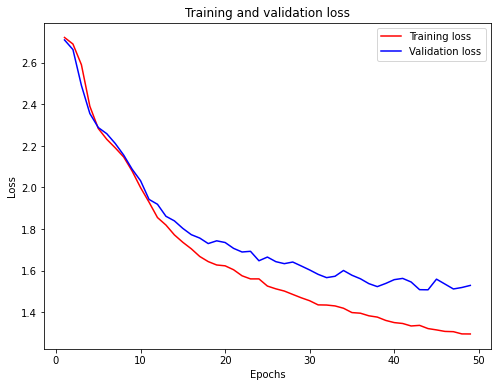

In [167]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy.

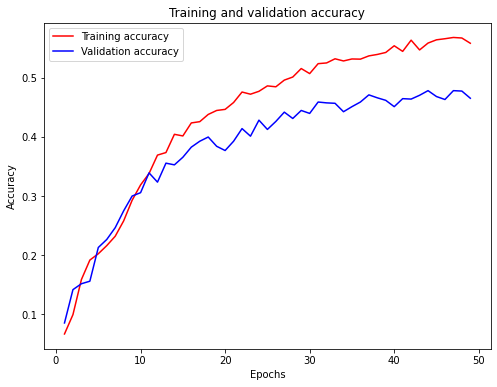

In [168]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss e accuracy finali.

In [169]:
final_loss, final_acc = model.evaluate(valid_dataset_mfccs, verbose=0)
print("Loss finale: {0:.6f}, accuracy finale: {1:.6f}".format(final_loss, final_acc))

Loss finale: 1.528462, accuracy finale: 0.465100


Salvataggio del modello.

In [170]:
model.save('modelloAdam_mfccs.h5')

## Modello 6 (4b)

Di seguito è possibile osservare il modello 6 applicato al dataset MFCCs. 

In [171]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [172]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 batch_normalization_92 (Bat  (None, 256, 256, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_93 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_66 (Conv2D)          (None, 128, 128, 32)      4640      
                                                     

In [173]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [174]:
history = model.fit(train_dataset_mfccs, epochs=50, validation_data=valid_dataset_mfccs, callbacks=[callback])

Epoch 1/50
103/103 [==============================] - 14s 115ms/step - loss: 2.0360 - accuracy: 0.3636 - val_loss: 8.3834 - val_accuracy: 0.0584
Epoch 2/50
103/103 [==============================] - 12s 112ms/step - loss: 1.3094 - accuracy: 0.5739 - val_loss: 10.0268 - val_accuracy: 0.0584
Epoch 3/50
103/103 [==============================] - 12s 114ms/step - loss: 0.9544 - accuracy: 0.6832 - val_loss: 5.9136 - val_accuracy: 0.1375
Epoch 4/50
103/103 [==============================] - 12s 114ms/step - loss: 0.7569 - accuracy: 0.7555 - val_loss: 6.9368 - val_accuracy: 0.0698
Epoch 5/50
103/103 [==============================] - 12s 112ms/step - loss: 0.6396 - accuracy: 0.7982 - val_loss: 3.8552 - val_accuracy: 0.1289
Epoch 6/50
103/103 [==============================] - 12s 112ms/step - loss: 0.5756 - accuracy: 0.8147 - val_loss: 1.4907 - val_accuracy: 0.5121
Epoch 7/50
103/103 [==============================] - 12s 111ms/step - loss: 0.4662 - accuracy: 0.8559 - val_loss: 3.3503 - val_a

Grafico della loss function

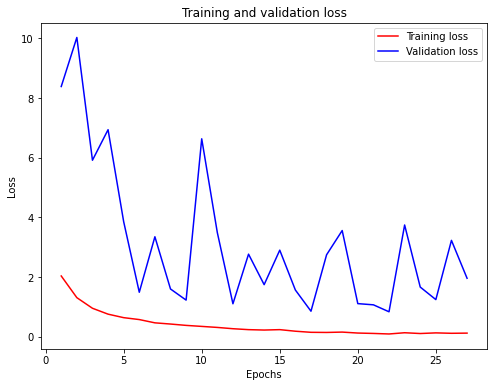

In [175]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Grafico dell'accuracy

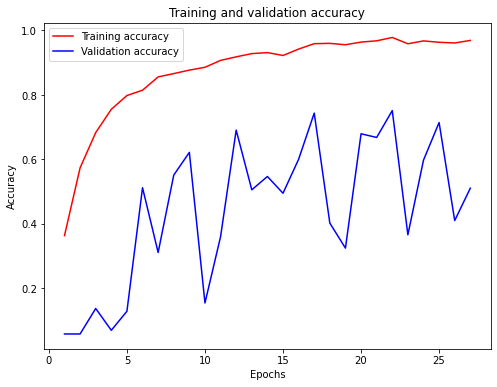

In [176]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss function e accuracy finali

In [177]:
final_loss, final_acc = model.evaluate(valid_dataset_mfccs, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 1.959771, final accuracy: 0.510684


Salvataggio del modello

In [178]:
model.save('modello6_mfccs.h5')